## Importing Neccessary Libraries

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df_2014 = pd.read_csv('constituency_wise_results_2014.csv')
df_2019 = pd.read_csv('constituency_wise_results_2019.csv')
df_states = pd.read_csv('dim_states_codes.csv')

In [ ]:
df_states.head()

,state_name,abbreviation
0,Andaman & Nicobar Islands,AN
1,Andhra Pradesh,AP
2,Arunachal Pradesh,AR
3,Assam,AS
4,Bihar,BR


In [ ]:
df_2014.shape

(8355, 12)

In [ ]:
df_2019.shape

(8597, 12)

In [ ]:
df_2014.columns

Index(['state', 'pc_name', 'candidate', 'sex', 'age', 'category', 'party',
       'party_symbol', 'general_votes', 'postal_votes', 'total_votes',
       'total_electors'],
      dtype='object')

In [ ]:
# Merge state codes with election results
df_2014 = pd.merge(df_2014, df_states, left_on='state', right_on='state_name', how='left') # left join
# Display merged DataFrames
df_2014.head()



,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,state_name,abbreviation
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282,Andhra Pradesh,AP
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282,Andhra Pradesh,AP
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282,Andhra Pradesh,AP
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282,Andhra Pradesh,AP
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282,Andhra Pradesh,AP


In [ ]:
# Merge state codes with election results
df_2019 = pd.merge(df_2019, df_states, left_on='state', right_on='state_name', how='left') # left join
# Display merged DataFrames
df_2019.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,state_name,abbreviation
0,Andhra Pradesh,Aruku,KISHORE CHANDRA DEO,MALE,72.0,ST,TDP,Bicycle,336163,1938,338101,1451418,Andhra Pradesh,AP
1,Andhra Pradesh,Aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,MALE,54.0,ST,BJP,Lotus,17578,289,17867,1451418,Andhra Pradesh,AP
2,Andhra Pradesh,Aruku,GODDETI. MADHAVI,FEMALE,26.0,ST,YSRCP,Ceiling Fan,557561,4629,562190,1451418,Andhra Pradesh,AP
3,Andhra Pradesh,Aruku,SHRUTI DEVI VYRICHERLA,FEMALE,46.0,ST,INC,Hand,17656,74,17730,1451418,Andhra Pradesh,AP
4,Andhra Pradesh,Aruku,GANGULAIAH VAMPURU.,MALE,49.0,ST,JnP,Glass Tumbler,42245,549,42794,1451418,Andhra Pradesh,AP


In [ ]:
df_2014 = df_2014.drop('state_name', axis=1)
df_2019 = df_2019.drop('state_name', axis=1)

In [ ]:
df_2014.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,abbreviation
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282,AP
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282,AP
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282,AP
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282,AP
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282,AP


In [ ]:
df_2014.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,abbreviation
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282,AP
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282,AP
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282,AP
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282,AP
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282,AP


In [ ]:
# Replace state name
df_2014['state'] = df_2014['state'].replace('Andhra Pradesh', 'Telangana')

# Replace state abbreviation
df_2014['abbreviation'] = df_2014['abbreviation'].replace('AP', 'TG')

In [ ]:
# Few states have same constituency names. So replacing constituency name followed by the respective state name to differentiate

counts = df_2014.groupby('pc_name').size()                                        # Obtaining the count of pc_name by using groupby

for index, row in df_2014.iterrows():                                             # Iterating through the DataFrame and appending the state name
    if counts[row['pc_name']] > 1:
        df_2014.at[index, 'pc_name'] = f"{row['pc_name']}_{row['state']}"

In [ ]:
# Few states have same constituency names. So replacing constituency name followed by the respective state name to differentiate

counts = df_2019.groupby('pc_name').size()                                         # Obtaining the count of pc_name by using groupby

for index, row in df_2019.iterrows():                                               # Iterating through the DataFrame and appending the state name
    if counts[row['pc_name']] > 1:
        df_2019.at[index, 'pc_name'] = f"{row['pc_name']}_{row['state']}"

In [ ]:
## Total votes for the each pc_name
grouped_total_votes_2014 = df_2014.groupby(['state','pc_name'])['total_votes'].sum()

In [ ]:
## Total Electrols for the each pc_name
grouped_total_electors_2014 = df_2014.groupby(['state','pc_name'])['total_electors'].first()

In [ ]:
# Calculate turnout ratio
turnout_ratio_2014 = (grouped_total_votes_2014 / grouped_total_electors_2014) * 100

# Display the turnout ratio
turnout_ratio_2014

state                      pc_name                                            
Andaman & Nicobar Islands  Andaman & Nicobar Islands_Andaman & Nicobar Islands    70.659341
Arunachal Pradesh          ARUNACHAL EAST_Arunachal Pradesh                       83.558573
                           ARUNACHAL WEST_Arunachal Pradesh                       75.153367
Assam                      Autonomous District_Assam                              77.364966
                           Barpeta_Assam                                          84.314999
                                                                                    ...    
West Bengal                Raiganj_West Bengal                                    79.868269
                           Ranaghat_West Bengal                                   84.424422
                           Srerampur_West Bengal                                  79.458301
                           Tamluk_West Bengal                                     87.586437
 

In [ ]:
## Same for the 2019

## Total votes for the each pc_name in 2019
grouped_total_votes_2019 = df_2019.groupby(['state','pc_name'])['total_votes'].sum()
## Total Electrols for the each pc_name
grouped_total_electors_2019 = df_2019.groupby(['state','pc_name'])['total_electors'].first()

In [ ]:
# Calculate turnout ratio for 2019
turnout_ratio_2019 = (grouped_total_votes_2019 / grouped_total_electors_2019) * 100

# Display the turnout ratio
turnout_ratio_2019

state                      pc_name                                            
Andaman & Nicobar Islands  Andaman & Nicobar Islands_Andaman & Nicobar Islands    65.091013
Andhra Pradesh             Amalapuram _Andhra Pradesh                             84.470551
                           Anakapalli_Andhra Pradesh                              81.406673
                           Anantapur_Andhra Pradesh                               80.659672
                           Aruku _Andhra Pradesh                                  74.033669
                                                                                    ...    
West Bengal                Raiganj_West Bengal                                    79.758497
                           Ranaghat_West Bengal                                   84.212417
                           Srerampur_West Bengal                                  78.506132
                           Tamluk_West Bengal                                     85.357001
 

In [ ]:

# Sort the turnout ratio for 2019
turnout_ratio_2014_sorted = turnout_ratio_2014.sort_values(ascending=False)

# Extract top 5 and bottom 5 constituencies for 2019
top_5_2014 = turnout_ratio_2014_sorted.head(5)
bottom_5_2014 = turnout_ratio_2014_sorted.tail(5)

# Display the results
print("Top 5 Constituencies - 2019:")
print(top_5_2014)
print("\nBottom 5 Constituencies - 2019:")
print(bottom_5_2014)


Top 5 Constituencies - 2019:
state        pc_name                
Assam        Dhubri_Assam               88.353376
Nagaland     Nagaland_Nagaland          87.822028
West Bengal  Tamluk_West Bengal         87.586437
             Bishnupur_West Bengal      86.717008
Lakshadweep  Lakshadweep_Lakshadweep    86.613116
dtype: float64

Bottom 5 Constituencies - 2019:
state            pc_name                  
Bihar            Patna Sahib_Bihar            45.331404
Maharashtra      Kalyan_Maharashtra           42.881447
Jammu & Kashmir  Baramulla_Jammu & Kashmir    39.133801
                 Anantnag_Jammu & Kashmir     28.842256
                 Srinagar_Jammu & Kashmir     25.861849
dtype: float64


In [ ]:

# Sort the turnout ratio for 2019
turnout_ratio_2019_sorted = turnout_ratio_2019.sort_values(ascending=False)

# Extract top 5 and bottom 5 constituencies for 2019
top_5_2019 = turnout_ratio_2019_sorted.head(5)
bottom_5_2019 = turnout_ratio_2019_sorted.tail(5)

# Display the results
print("Top 5 Constituencies - 2019:")
print(top_5_2019)
print("\nBottom 5 Constituencies - 2019:")
print(bottom_5_2019)


Top 5 Constituencies - 2019:
state              pc_name                         
Assam              Dhubri_Assam                        90.661564
West Bengal        Bishnupur_West Bengal               87.306347
Assam              Barpeta_Assam                       86.553118
West Bengal        Jalpaiguri_West Bengal              86.485343
Arunachal Pradesh  ARUNACHAL EAST_Arunachal Pradesh    86.460087
dtype: float64

Bottom 5 Constituencies - 2019:
state            pc_name                  
Maharashtra      Kalyan_Maharashtra           45.292968
Telangana        Hyderabad_Telangana          44.836718
Jammu & Kashmir  Baramulla_Jammu & Kashmir    34.570605
                 Srinagar_Jammu & Kashmir     14.430848
                 Anantnag_Jammu & Kashmir      8.935318
dtype: float64


## Top 5 Constituencies with Highest Turnout Ratio - 2014

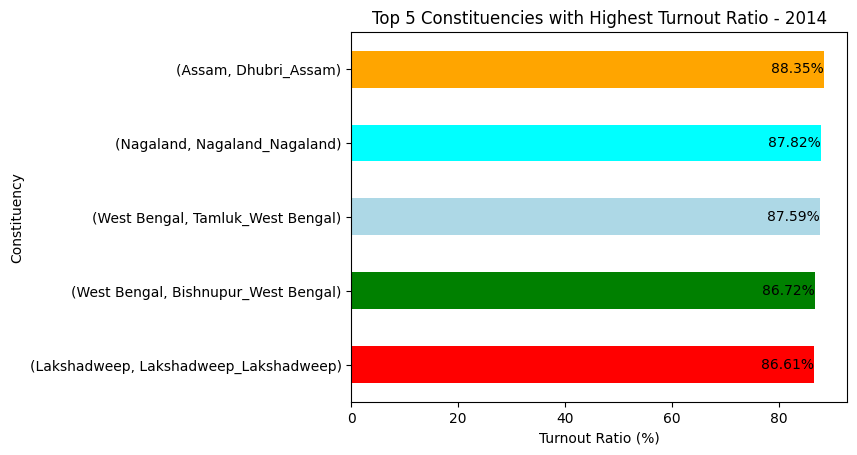

In [ ]:
# Sort the data in descending order
top_5_2014_sorted = top_5_2014.sort_values(ascending=True)

# Plot the data as a horizontal bar chart
top_5_2014_sorted.plot(kind='barh',y = "pc_name" , color=['red', 'green', 'lightblue', 'aqua', 'orange'])


# Add percentage labels to the bars
for i, value in enumerate(top_5_2014_sorted.values):
    plt.text(value, i, f'{value:.2f}%', ha='right', va='center')

# Add labels and title
plt.xlabel("Turnout Ratio (%)")
plt.ylabel("Constituency")
plt.title("Top 5 Constituencies with Highest Turnout Ratio - 2014")

# Show the plot
plt.show()

## Bottom 5 Constituencies with Lowest Turnout Ratio - 2014

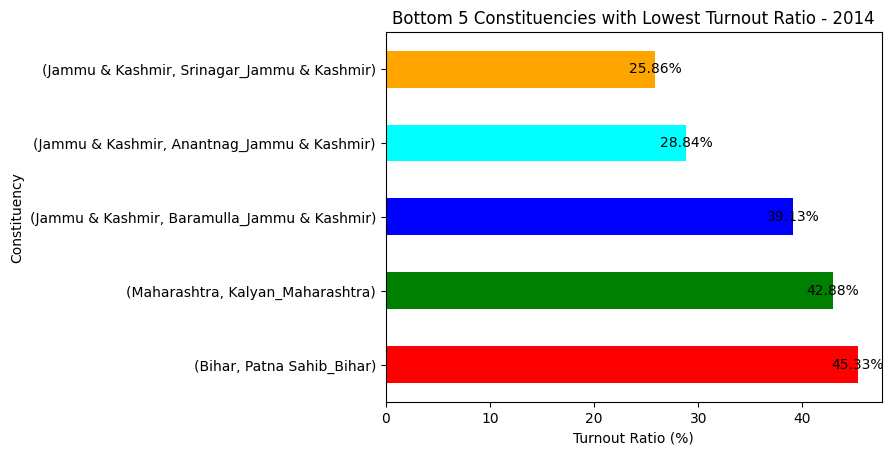

In [ ]:
# Sort the data in descending order
bottom_5_2014_sorted = bottom_5_2014.sort_values(ascending=False)

# Plot the data as a horizontal bar chart
bottom_5_2014_sorted.plot(kind='barh', color=['red', 'green', 'blue', 'aqua', 'orange'])

# Add percentage labels to the bars
for i, value in enumerate(bottom_5_2014_sorted.values):
    plt.text(value, i, f'{value:.2f}%', ha='center', va='center')

# Add labels and title
plt.xlabel("Turnout Ratio (%)")
plt.ylabel("Constituency")
plt.title("Bottom 5 Constituencies with Lowest Turnout Ratio - 2014")

# Show the plot
plt.show()

## Top 5 Constituencies with Highest Turnout Ratio - 2019

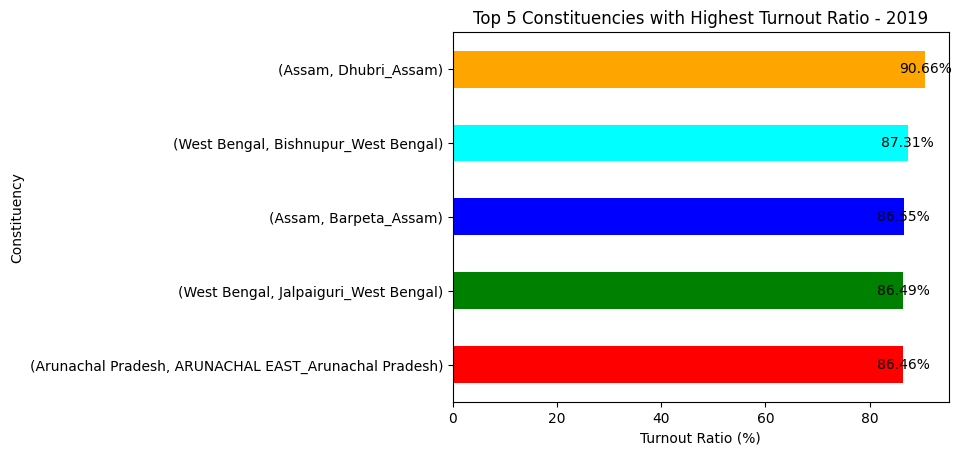

In [ ]:
# Sort the data in descending order
top_5_2019_sorted = top_5_2019.sort_values(ascending=True)

# Plot the data as a horizontal bar chart
top_5_2019_sorted.plot(kind='barh', color=['red', 'green', 'blue', 'aqua', 'orange'])

# Add percentage labels to the bars
for i, value in enumerate(top_5_2019_sorted.values):
    plt.text(value, i, f'{value:.2f}%', ha='center', va='center')

# Add labels and title
plt.xlabel("Turnout Ratio (%)")
plt.ylabel("Constituency")
plt.title("Top 5 Constituencies with Highest Turnout Ratio - 2019")

# Show the plot
plt.show()

## Bottom 5 Constituencies with Lowest Turnout Ratio - 2019

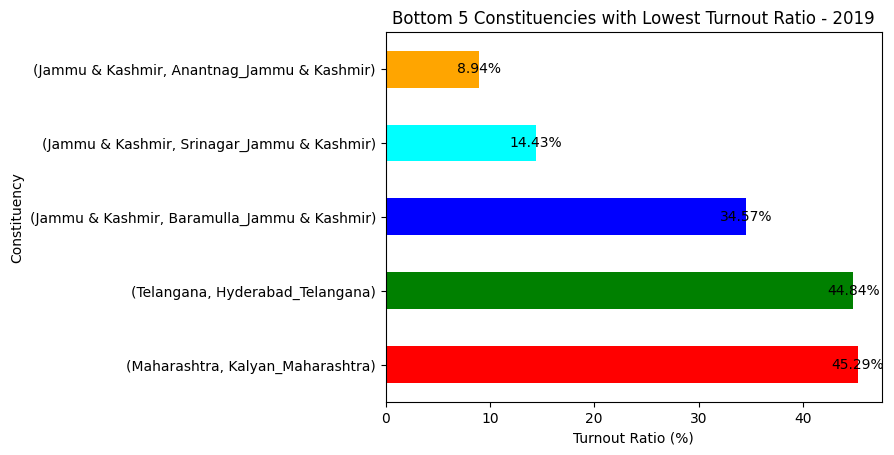

In [ ]:
# Sort the data in descending order
bottom_5_2019_sorted = bottom_5_2019.sort_values(ascending=False)

# Plot the data as a horizontal bar chart
bottom_5_2019_sorted.plot(kind='barh', color=['red', 'green', 'blue', 'aqua', 'orange'])

# Add percentage labels to the bars
for i, value in enumerate(bottom_5_2019_sorted.values):
    plt.text(value, i, f'{value:.2f}%', ha='center', va='center')

# Add labels and title
plt.xlabel("Turnout Ratio (%)")
plt.ylabel("Constituency")
plt.title("Bottom 5 Constituencies with Lowest Turnout Ratio - 2019")

# Show the plot
plt.show()

## 2. List top 5/bottom 5 states of 2014 and 2019 in terms of voter turnout ratio

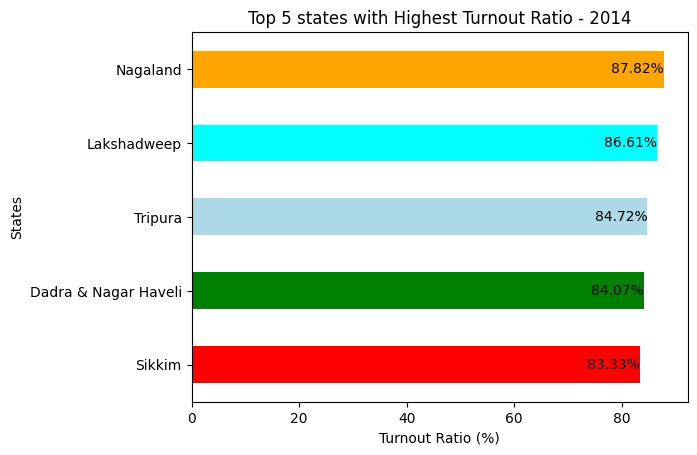

In [ ]:
# For year 2014

total_votes_state_2014 = df_2014.groupby('state')['total_votes'].sum()
total_electrols_state_2014 = df_2014.groupby(['state','pc_name'])['total_electors'].first()
total_electrols_state_2014 = total_electrols_state_2014.groupby('state').sum()

# Calculate turnout ratio for 2014
turnout_ratio_state_2014 = (total_votes_state_2014 / total_electrols_state_2014) * 100


# Display the turnout ratio
turnout_ratio_state_2014_sorted = turnout_ratio_state_2014.sort_values(ascending=False)

# Extract top 5 and bottom 5 constituencies for 2019
top_5_2014_states = turnout_ratio_state_2014_sorted.head(5)
bottom_5_2014_states = turnout_ratio_state_2014_sorted.tail(5)

## sort the top_5_2014_states on ascending order
top_5_2014_states_sorted = top_5_2014_states.sort_values(ascending=True)

# Plot the data as a horizontal bar chart
top_5_2014_states_sorted.plot(kind='barh', color=['red', 'green', 'lightblue', 'aqua', 'orange'])

# Add percentage labels to the bars
for i, value in enumerate(top_5_2014_states_sorted.values):
    plt.text(value, i, f'{value:.2f}%', ha='right', va='center')

# Add labels and title
plt.xlabel("Turnout Ratio (%)")
plt.ylabel("States")
plt.title("Top 5 states with Highest Turnout Ratio - 2014")

# Show the plot
plt.show()

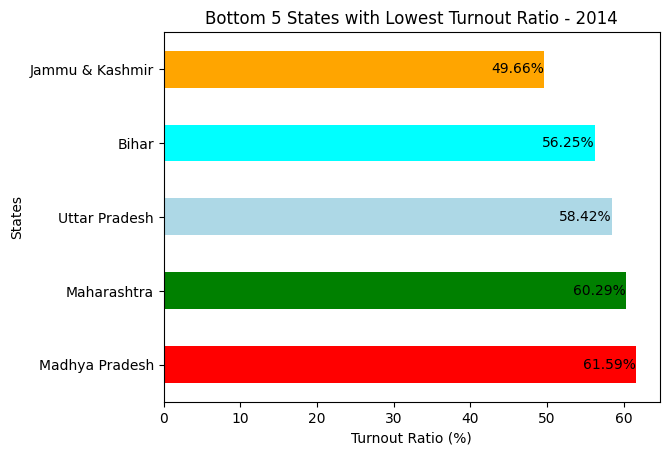

In [ ]:
# Plot the data as a horizontal bar chart

## sort the top_5_2014_states on ascending order

bottom_5_2014_states.plot(kind='barh', color=['red', 'green', 'lightblue', 'aqua', 'orange'])

# Add percentage labels to the bars
for i, value in enumerate(bottom_5_2014_states.values):
    plt.text(value, i, f'{value:.2f}%', ha='right', va='center')

# Add labels and title
plt.xlabel("Turnout Ratio (%)")
plt.ylabel("States")
plt.title("Bottom 5 States with Lowest Turnout Ratio - 2014")

# Show the plot
plt.show()


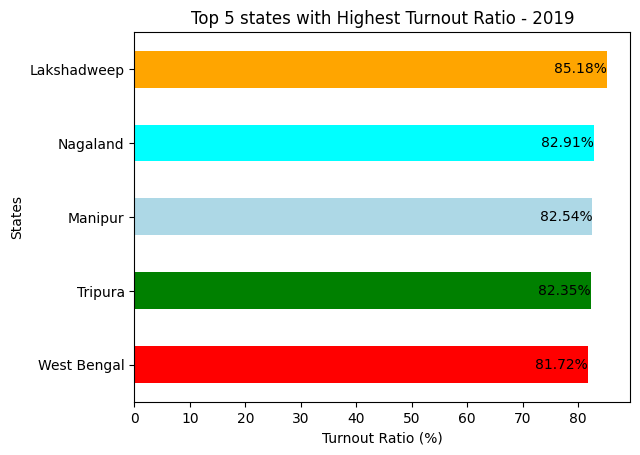

In [ ]:
## For year 2019

total_votes_state_2019 = df_2019.groupby('state')['total_votes'].sum()
total_electrols_state_2019 = df_2019.groupby(['state','pc_name'])['total_electors'].first()
total_electrols_state_2019= total_electrols_state_2019.groupby('state').sum()

# Calculate turnout ratio for 2019
turnout_ratio_state_2019 = (total_votes_state_2019 / total_electrols_state_2019) * 100

# Display the turnout ratio
turnout_ratio_state_2019_sorted = turnout_ratio_state_2019.sort_values(ascending=False)

# Extract top 5 and bottom 5 constituencies for 2019
top_5_2019_states = turnout_ratio_state_2019_sorted.head(5)
bottom_5_2019_states = turnout_ratio_state_2019_sorted.tail(5)

## sort the top_5_2014_states on ascending order
top_5_2019_states_sorted = top_5_2019_states.sort_values(ascending=True)

# Plot the data as a horizontal bar chart
top_5_2019_states_sorted.plot(kind='barh', color=['red', 'green', 'lightblue', 'aqua', 'orange'])

# Add percentage labels to the bars
for i, value in enumerate(top_5_2019_states_sorted.values):
    plt.text(value, i, f'{value:.2f}%', ha='right', va='center')

# Add labels and title
plt.xlabel("Turnout Ratio (%)")
plt.ylabel("States")
plt.title("Top 5 states with Highest Turnout Ratio - 2019")

# Show the plot
plt.show()

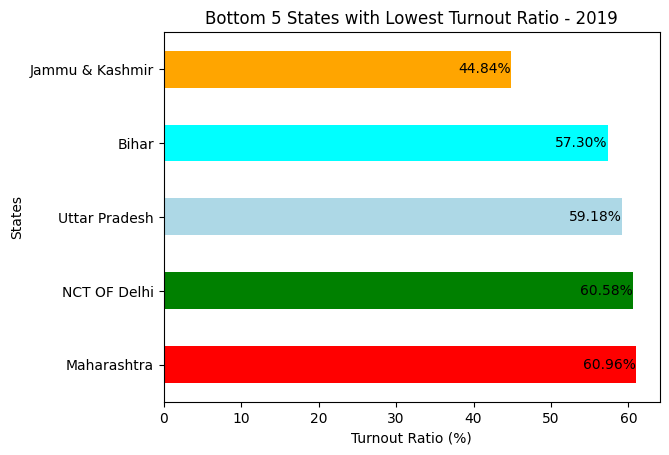

In [ ]:
# Plot the data as a horizontal bar chart
bottom_5_2019_states.plot(kind='barh', color=['red', 'green', 'lightblue', 'aqua', 'orange'])

# Add percentage labels to the bars
for i, value in enumerate(bottom_5_2019_states.values):
    plt.text(value, i, f'{value:.2f}%', ha='right', va='center')

# Add labels and title
plt.xlabel("Turnout Ratio (%)")
plt.ylabel("States")
plt.title("Bottom 5 States with Lowest Turnout Ratio - 2019")

# Show the plot
plt.show()

## 3.	Which constituencies have elected the same party for two consecutive elections, rank them by % of votes to that winning party in 2019


In [ ]:
# Merge total votes data
total_votes_cast = grouped_total_votes_2014.to_frame(name='total_votes_cast_2014').reset_index()
total_votes_cast = total_votes_cast.merge(grouped_total_votes_2019.to_frame(name='total_votes_cast_2019').reset_index(), on=['state', 'pc_name'])


In [ ]:
total_votes_cast

,state,pc_name,total_votes_cast_2014,total_votes_cast_2019
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands_Andaman & Nicobar Is...,190328,207296
1,Arunachal Pradesh,ARUNACHAL EAST_Arunachal Pradesh,261291,293781
2,Arunachal Pradesh,ARUNACHAL WEST_Arunachal Pradesh,335665,358310
3,Assam,Autonomous District_Assam,543280,617735
4,Assam,Barpeta_Assam,1205863,1458549
...,...,...,...,...
476,West Bengal,Raiganj_West Bengal,1108193,1277109
477,West Bengal,Ranaghat_West Bengal,1353196,1484035
478,West Bengal,Srerampur_West Bengal,1290433,1401705
479,West Bengal,Tamluk_West Bengal,1337684,1446499


In [ ]:
## Finding the winning partys
winning_party_2014_df = df_2014.loc[df_2014.groupby(['state' , 'pc_name'])['total_votes'].idxmax()]
winning_party_2019_df = df_2019.loc[df_2019.groupby(['state','pc_name'])['total_votes'].idxmax()]

merged_winning_party_df = pd.merge(winning_party_2014_df , winning_party_2019_df , on ='pc_name' ,suffixes=('_2014', '_2019'))

matched_parties_df = merged_winning_party_df[merged_winning_party_df['party_2014'] == merged_winning_party_df['party_2019']]

matched_parties_df = pd.merge(matched_parties_df ,total_votes_cast , on= 'pc_name' )
matched_parties_df.drop('state' , axis='columns' )
matched_parties_df.head()

,state_2014,pc_name,candidate_2014,sex_2014,age_2014,category_2014,party_2014,party_symbol_2014,general_votes_2014,postal_votes_2014,...,party_2019,party_symbol_2019,general_votes_2019,postal_votes_2019,total_votes_2019,total_electors_2019,abbreviation_2019,state,total_votes_cast_2014,total_votes_cast_2019
0,Arunachal Pradesh,ARUNACHAL WEST_Arunachal Pradesh,KIREN RIJIJU,M,42.0,ST,BJP,Lotus,162575,6792,...,BJP,Lotus,216494,9302,225796,463775,AR,Arunachal Pradesh,335665,358310
1,Assam,Dhubri_Assam,BADRUDDIN AJMAL,M,59.0,GEN,AIUDF,Lock and Key,592338,231,...,AIUDF,Lock and Key,718131,633,718764,1858566,AS,Assam,1369624,1685005
2,Assam,Dibrugarh_Assam,RAMESWAR TELI,M,43.0,GEN,BJP,Lotus,494278,86,...,BJP,Lotus,657983,1600,659583,1314319,AS,Assam,890968,1015748
3,Assam,Gauhati_Assam,BIJOYA CHAKRAVARTY,F,75.0,GEN,BJP,Lotus,764904,81,...,BJP,Lotus,1007156,1780,1008936,2181319,AS,Assam,1511729,1763757
4,Assam,Jorhat_Assam,KAMAKHYA PRASAD TASA,M,38.0,GEN,BJP,Lotus,456170,250,...,BJP,Lotus,540942,2346,543288,1365035,AS,Assam,931336,1057965


In [ ]:
matched_parties_df['percentage_vote_share_2019'] = ( matched_parties_df['total_votes_2019'] / matched_parties_df['total_votes_cast_2019']) * 100

ranked_df = matched_parties_df.sort_values(by='percentage_vote_share_2019', ascending=False)
ranked_df[['pc_name' ,'candidate_2014' , 'party_2019' ,'percentage_vote_share_2019']].head(10)

,pc_name,candidate_2014,party_2019,percentage_vote_share_2019
59,Surat_Gujarat,DARSHANA VIKRAM JARDOSH,BJP,74.470429
53,Navsari_Gujarat,C. R. PATIL,BJP,74.367402
61,Vadodara_Gujarat,NARENDRA MODI,BJP,72.296842
71,Kangra_Himachal Pradesh,SHANTA KUMAR,BJP,72.018463
206,Bhilwara_Rajasthan,SUBHASH BAHERIA,BJP,71.587233
166,Mumbai North_Maharashtra,GOPAL CHINAYYA SHETTY,BJP,71.398997
67,Karnal_Haryana,ASHWINI KUMAR,BJP,70.083692
47,Gandhinagar_Gujarat,L.K.ADVANI,BJP,69.669883
220,Rajsamand_Rajasthan,HARIOM SINGH RATHORE,BJP,69.608620
128,HOSHANGABAD_Madhya Pradesh,UDAY PRATAP SINGH,BJP,69.353701


## 4.Which constituencies have voted for different parties in two elections (list top 10 based on difference (2019-2014) in winner vote percentage in two elections)


In [ ]:
different_parties_df = merged_winning_party_df[merged_winning_party_df['party_2014'] != merged_winning_party_df['party_2019']]

different_parties_df = pd.merge(different_parties_df ,total_votes_cast , on= 'pc_name' )
different_parties_df.drop('state' , axis='columns' )
different_parties_df.head()

# Calculate the percentage of votes for the winning party in 2014
different_parties_df['vote_percentage_2014'] = (different_parties_df['total_votes_2014'] / different_parties_df['total_votes_cast_2014']) * 100

# Calculate the percentage of votes for the winning party in 2019
different_parties_df['vote_percentage_2019'] = (different_parties_df['total_votes_2019'] / different_parties_df['total_votes_cast_2019']) * 100

# Calculate the difference in vote percentages
different_parties_df['vote_percentage_diff'] = different_parties_df['vote_percentage_2019'] - different_parties_df['vote_percentage_2014']


different_parties_df.sort_values(by='vote_percentage_diff' , ascending=False)
top_10_vote_diff = different_parties_df[['pc_name', 'party_2014','total_votes_2014','party_2019','total_votes_2019', 'vote_percentage_diff']].head(10).sort_values(by = 'vote_percentage_diff' , ascending=False)

In [ ]:
top_10_vote_diff

,pc_name,party_2014,total_votes_2014,party_2019,total_votes_2019,vote_percentage_diff
2,Autonomous District_Assam,INC,213152,BJP,381316,22.493807
9,Bhagalpur_Bihar,RJD,367623,JD(U),618254,21.560902
8,Banka_Bihar,RJD,285150,JD(U),477788,16.273902
3,Barpeta_Assam,AIUDF,394702,INC,645173,11.501982
7,Araria_Bihar,RJD,407978,BJP,618434,11.065207
6,Silchar_Assam,INC,336451,BJP,499414,10.521409
5,Nowgong_Assam,BJP,494146,INC,739724,9.358336
1,ARUNACHAL EAST_Arunachal Pradesh,INC,118455,BJP,153883,7.045662
4,Karimganj _Assam,AIUDF,362866,BJP,473046,3.710903
0,Andaman & Nicobar Islands_Andaman & Nicobar Is...,BJP,90969,INC,95308,-1.819143


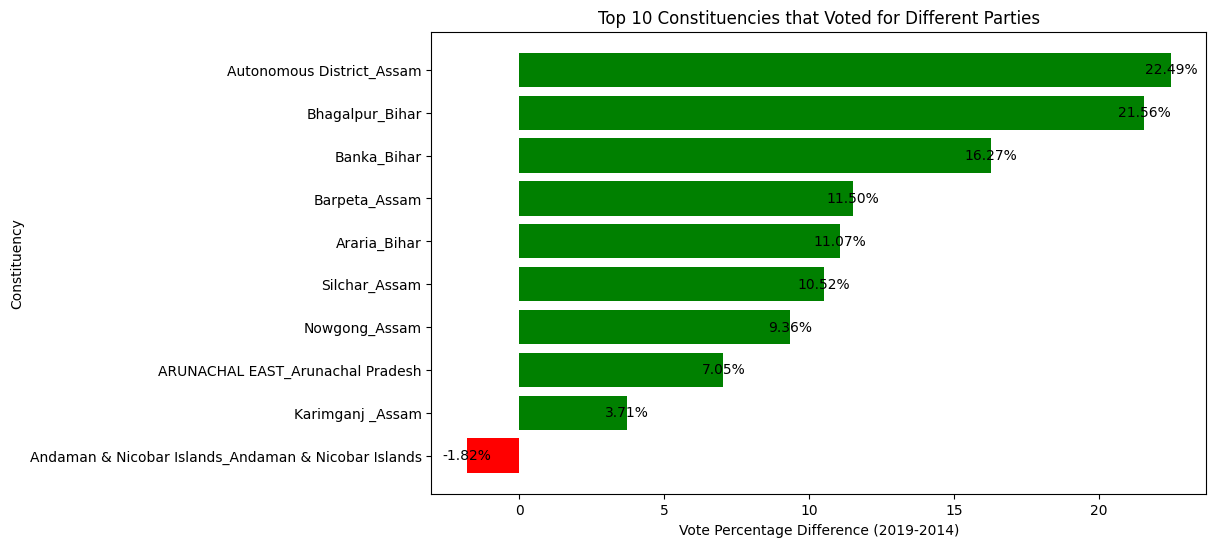

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Define colors based on vote_percentage_diff
colors = ['green' if diff > 0 else 'red' for diff in top_10_vote_diff['vote_percentage_diff']]

bars = plt.barh(top_10_vote_diff['pc_name'], top_10_vote_diff['vote_percentage_diff'], color=colors)

# Adding title and labels
plt.title('Top 10 Constituencies that Voted for Different Parties')
plt.xlabel('Vote Percentage Difference (2019-2014)')
plt.ylabel('Constituency')

# Annotate the bars with the percentage difference
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', ha='center', va='center')

# Show the plot
plt.gca().invert_yaxis()  # Invert y-axis to have the largest value at the top
plt.show()

## 5.Top 5 candidates based on margin difference with runners in 2014 and 2019

In [ ]:
df_2014.columns

Index(['state', 'pc_name', 'candidate', 'sex', 'age', 'category', 'party',
       'party_symbol', 'general_votes', 'postal_votes', 'total_votes',
       'total_electors', 'abbreviation'],
      dtype='object')

In [ ]:
# Sort data by state, pc_name, and votes in descending order
df_2014_sorted = df_2014.sort_values(by=['pc_name', 'total_votes'], ascending=[True, False])
# Group by state and pc_name and calculate winner and runner-up
grouped_2014 = df_2014_sorted.groupby('pc_name')

# Create a DataFrame for winners
winners_2014 = grouped_2014.first().reset_index()
winners_2014 = winners_2014.rename(columns={'candidate': 'winner_candidate', 'party': 'winner_party', 'total_votes': 'winner_votes'})

# Create a DataFrame for runner-ups
runner_ups_2014 = grouped_2014.nth(1).reset_index()
runner_ups_2014 = runner_ups_2014.rename(columns={'candidate': 'runner_up_candidate', 'party': 'runner_up_party', 'total_votes': 'runner_up_votes'})

# Merge winners and runner-ups into a single DataFrame
merged_df_2014 = pd.merge(winners_2014, runner_ups_2014, on=['state', 'pc_name'], suffixes=('_winner', '_runner_up'))

# Calculate the margin of victory
merged_df_2014['margin'] = merged_df_2014['winner_votes'] - merged_df_2014['runner_up_votes']

merged_df_2014[['state', 'pc_name', 'winner_candidate', 'winner_party', 'winner_votes', 'runner_up_candidate', 'runner_up_party', 'runner_up_votes', 'margin']]

top_5_candidates_margin_diff_2014 =merged_df_2014.sort_values(by='margin' , ascending = False).head(5)
print("Top 5 candidates based on margin difference with runners in 2014 ")
top_5_candidates_margin_diff_2014[['pc_name','winner_candidate','winner_party','margin']]

Top 5 candidates based on margin difference with runners in 2014 


,pc_name,winner_candidate,winner_party,margin
494,Vadodara_Gujarat,NARENDRA MODI,BJP,570128
178,Ghaziabad_Uttar Pradesh,VIJAY KUMAR SINGH,BJP,567260
360,Navsari_Gujarat,C. R. PATIL,BJP,558116
216,Jaipur_Rajasthan,RAMCHARAN BOHARA,BJP,539345
460,Surat_Gujarat,DARSHANA VIKRAM JARDOSH,BJP,533190


In [ ]:
# Sort data by state, pc_name, and votes in descending order
df_2019_sorted = df_2019.sort_values(by=['pc_name', 'total_votes'], ascending=[True, False])
# Group by state and pc_name and calculate winner and runner-up
grouped_2019 = df_2019_sorted.groupby('pc_name')

# Create a DataFrame for winners
winners_2019 = grouped_2019.first().reset_index()
winners_2019 = winners_2014.rename(columns={'candidate': 'winner_candidate', 'party': 'winner_party', 'total_votes': 'winner_votes'})

# Create a DataFrame for runner-ups
runner_ups_2019 = grouped_2019.nth(1).reset_index()
runner_ups_2019 = runner_ups_2019.rename(columns={'candidate': 'runner_up_candidate', 'party': 'runner_up_party', 'total_votes': 'runner_up_votes'})

# Merge winners and runner-ups into a single DataFrame
merged_df_2019 = pd.merge(winners_2019, runner_ups_2019, on=['state', 'pc_name'], suffixes=('_winner', '_runner_up'))

# Calculate the margin of victory
merged_df_2019['margin'] = merged_df_2019['winner_votes'] - merged_df_2019['runner_up_votes']

merged_df_2019[['state', 'pc_name', 'winner_candidate', 'winner_party', 'winner_votes', 'runner_up_candidate', 'runner_up_party', 'runner_up_votes', 'margin']]

top_5_candidates_margin_diff_2019 =merged_df_2019.sort_values(by='margin' , ascending = False).head(5)
print("Top 5 candidates based on margin difference with runners in 2019 ")
top_5_candidates_margin_diff_2019[['pc_name','winner_candidate','winner_party','margin']]

Top 5 candidates based on margin difference with runners in 2019 


,pc_name,winner_candidate,winner_party,margin
467,Vadodara_Gujarat,NARENDRA MODI,BJP,550922
339,Navsari_Gujarat,C. R. PATIL,BJP,537760
434,Surat_Gujarat,DARSHANA VIKRAM JARDOSH,BJP,470991
160,Gandhinagar_Gujarat,L.K.ADVANI,BJP,435929
316,Mumbai North_Maharashtra,GOPAL CHINAYYA SHETTY,BJP,422573


## 6.% Split of votes of parties between 2014 vs 2019 at national level

In [ ]:
# Calculate total votes for each party for 2014
total_votes_2014 = df_2014.groupby('party')['total_votes'].sum().reset_index()
total_votes_2014 = total_votes_2014.rename(columns={'total_votes': 'total_votes_2014'})

# Calculate total votes for each party for 2019
total_votes_2019 = df_2019.groupby('party')['total_votes'].sum().reset_index()
total_votes_2019 = total_votes_2019.rename(columns={'total_votes': 'total_votes_2019'})

# Merge the results into a single DataFrame
merged_votes = pd.merge(total_votes_2014, total_votes_2019, on='party', how='outer').fillna(0)

# Calculate the percentage of votes for each party in 2014
total_votes_2014_sum = merged_votes['total_votes_2014'].sum()
merged_votes['percent_votes_2014'] = (merged_votes['total_votes_2014'] / total_votes_2014_sum) * 100

# Calculate the percentage of votes for each party in 2019
total_votes_2019_sum = merged_votes['total_votes_2019'].sum()
merged_votes['percent_votes_2019'] = (merged_votes['total_votes_2019'] / total_votes_2019_sum) * 100
print("Top 10 parties by vote share in 2014 Election \n\n ")
top_10_parties_2014 = merged_votes[['party', 'percent_votes_2014']].sort_values(by='percent_votes_2014', ascending = False).head(10)
top_10_parties_2014

Top 10 parties by vote share in 2014 Election 

 


,party,percent_votes_2014
80,BJP,30.969622
163,INC,18.584291
110,BSP,4.314084
31,AITC,4.079790
385,SP,3.583059
17,ADMK,3.482872
126,CPM,3.449519
164,IND,3.055294
406,TDP,2.711294
428,YSRCP,2.691334


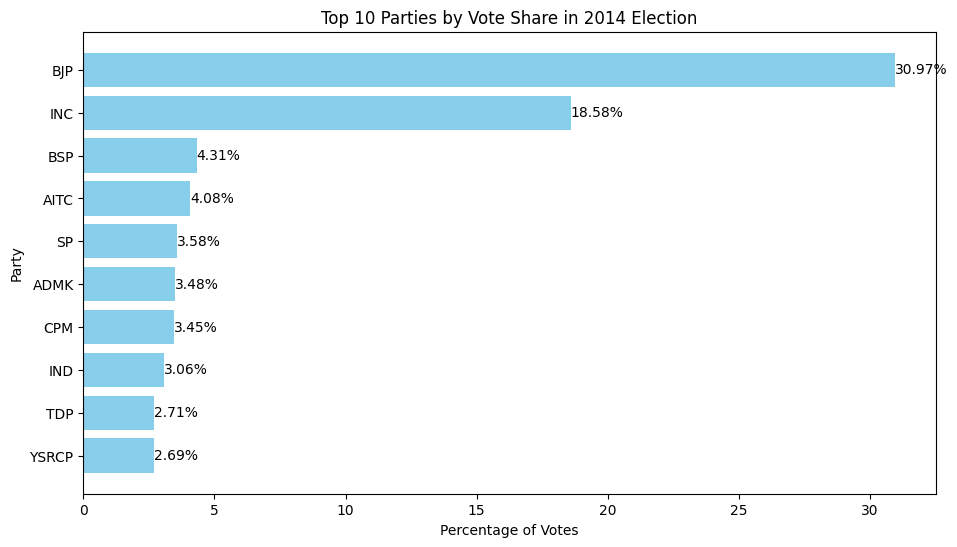

In [ ]:

# Plotting the bar chart
plt.figure(figsize=(11, 6))
bars = plt.barh(top_10_parties_2014['party'], top_10_parties_2014['percent_votes_2014'], color='skyblue')
plt.xlabel('Percentage of Votes')
plt.ylabel('Party')
plt.title('Top 10 Parties by Vote Share in 2014 Election')

# Adding percentage values on each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, '{:.2f}%'.format(width), ha='left', va='center')

plt.gca().invert_yaxis()  # Invert y-axis to have the highest percentage at the top
plt.show()

In [ ]:
print("Top 10 parties by vote share in 2019 Election \n \n ")
top_10_parties_2019 = merged_votes[['party', 'percent_votes_2019']].sort_values(by='percent_votes_2019', ascending = False).head(10)
top_10_parties_2019

Top 10 parties by vote share in 2019 Election 
 
 


,party,percent_votes_2019
80,BJP,37.298440
163,INC,19.456285
31,AITC,4.059009
110,BSP,3.622189
164,IND,2.700107
385,SP,2.547688
428,YSRCP,2.529745
134,DMK,2.338647
377,SHS,2.093695
406,TDP,2.037756


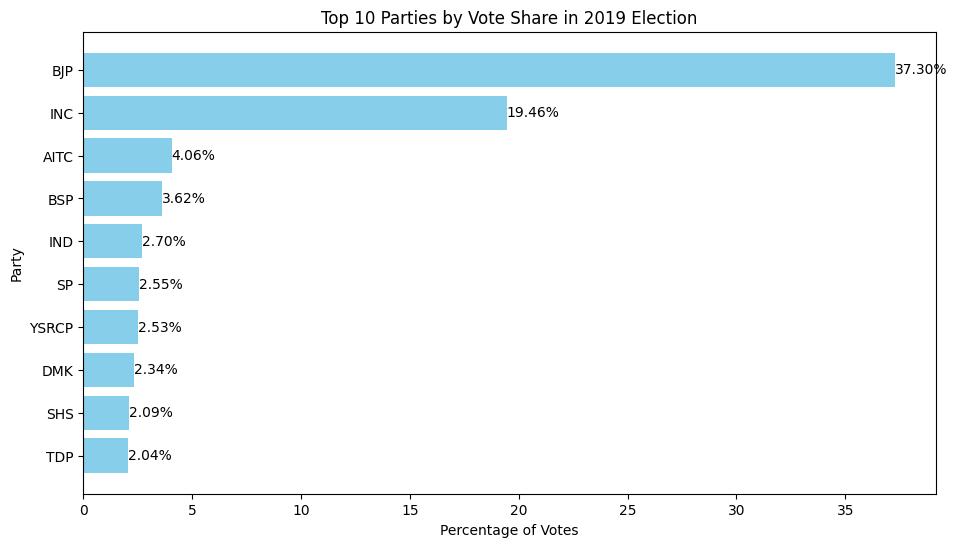

In [ ]:

# Plotting the bar chart
plt.figure(figsize=(11, 6))
bars = plt.barh(top_10_parties_2019['party'], top_10_parties_2019['percent_votes_2019'], color='skyblue')
plt.xlabel('Percentage of Votes')
plt.ylabel('Party')
plt.title('Top 10 Parties by Vote Share in 2019 Election')

# Adding percentage values on each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, '{:.2f}%'.format(width), ha='left', va='center')

plt.gca().invert_yaxis()  # Invert y-axis to have the highest percentage at the top
plt.show()

# **7.	% Split of votes of parties between 2014 vs 2019 at state level.**

In [ ]:
# Calculate total votes for each party for 2014 at state level
total_votes_2014_state_party = df_2014.groupby(['state', 'party'])['total_votes'].sum().reset_index()
total_votes_2014_state_party = total_votes_2014_state_party.rename(columns={'total_votes': 'total_votes_2014_party'})

# Calculate total votes for each party for 2019 at state level
total_votes_2019_state_party = df_2019.groupby(['state', 'party'])['total_votes'].sum().reset_index()
total_votes_2019_state_party = total_votes_2019_state_party.rename(columns={'total_votes': 'total_votes_2019_party'})

# Merge the results into a single DataFrame
merged_votes_state = pd.merge(total_votes_2014_state_party, total_votes_2019_state_party, on=['state', 'party'], how='outer').fillna(0)

# Calculate the total votes for each state in 2014 and 2019
total_votes_state_2014 = df_2014.groupby('state')['total_votes'].sum().reset_index().rename(columns={'total_votes': 'Net_total_votes_2014'})
total_votes_state_2019 = df_2019.groupby('state')['total_votes'].sum().reset_index().rename(columns={'total_votes': 'Net_total_votes_2019'})


# Map the total state votes to the merged DataFrame
merged_votes_state = merged_votes_state.merge(total_votes_state_2014, on='state', how='left' )
merged_votes_state = merged_votes_state.merge(total_votes_state_2019, on='state', how='left' )

# Calculate the percentage of votes for each party in 2014 and 2019 at state level
merged_votes_state['percent_votes_2014'] = (merged_votes_state['total_votes_2014_party'] / merged_votes_state['Net_total_votes_2014']) * 100
merged_votes_state['percent_votes_2019'] = (merged_votes_state['total_votes_2019_party'] / merged_votes_state['Net_total_votes_2019']) * 100

percent_votes_parties_df = merged_votes_state[['state' ,'party' , 'percent_votes_2014' ,'percent_votes_2019']]
percent_votes_parties_df


,state,party,percent_votes_2014,percent_votes_2019
0,Andaman & Nicobar Islands,AAAP,1.963453,1.369539
1,Andaman & Nicobar Islands,AIFB,0.118217,0.000000
2,Andaman & Nicobar Islands,AITC,1.199508,0.830214
3,Andaman & Nicobar Islands,BJP,47.795910,45.298028
4,Andaman & Nicobar Islands,BSP,0.598441,1.199251
...,...,...,...,...
1942,West Bengal,RVNP,0.000000,0.056259
1943,West Bengal,SHS,0.000000,0.092384
1944,West Bengal,STPI,0.000000,0.001276
1945,West Bengal,SUCI(C),0.000000,0.379982


# **Highest Vote share Parties from each State**

In [ ]:
# Drop rows with NaN values in percentage columns
percent_votes_parties_df = percent_votes_parties_df.dropna(subset=['percent_votes_2014', 'percent_votes_2019'])

# Find the party with the highest vote share in each state for 2014
idx_2014 = percent_votes_parties_df.groupby('state')['percent_votes_2014'].idxmax()
highest_vote_share_2014 = percent_votes_parties_df.loc[idx_2014, ['state', 'party', 'percent_votes_2014']].reset_index(drop=True)
highest_vote_share_2014 = highest_vote_share_2014.rename(columns={'party': 'highest_vote_share_party_2014', 'percent_votes_2014': 'highest_percent_votes_2014'})

# Find the party with the highest vote share in each state for 2019
idx_2019 = percent_votes_parties_df.groupby('state')['percent_votes_2019'].idxmax()
highest_vote_share_2019 = percent_votes_parties_df.loc[idx_2019, ['state', 'party', 'percent_votes_2019']].reset_index(drop=True)
highest_vote_share_2019 = highest_vote_share_2019.rename(columns={'party': 'highest_vote_share_party_2019', 'percent_votes_2019': 'highest_percent_votes_2019'})

# Merge the results
highest_vote_share_df = pd.merge(highest_vote_share_2014, highest_vote_share_2019, on='state')
highest_vote_share_df = highest_vote_share_df.sort_values(by='highest_percent_votes_2019' , ascending = False)
highest_vote_share_df

,state,highest_vote_share_party_2014,highest_percent_votes_2014,highest_vote_share_party_2019,highest_percent_votes_2019
10,Himachal Pradesh,BJP,53.348233,BJP,69.111042
8,Gujarat,BJP,59.050655,BJP,62.207886
31,Uttarakhand,BJP,55.322378,BJP,61.013396
25,Rajasthan,BJP,54.941915,BJP,58.470314
1,Arunachal Pradesh,BJP,46.124673,BJP,58.224849
9,Haryana,BJP,34.740970,BJP,58.016213
16,Madhya Pradesh,BJP,54.034411,BJP,57.996633
21,NCT OF Delhi,BJP,46.409074,BJP,56.556449
23,Puducherry,AINRC,34.570287,INC,56.272573
13,Karnataka,BJP,43.011517,BJP,51.377721


# **8.	List top 5 constituencies for two major national parties where they have gained vote share in 2019 as compared to 2014.**


In [ ]:
# Calculate total votes for each constituency
total_votes_2014 = df_2014.groupby('pc_name')['total_votes'].sum().reset_index().rename(columns={'total_votes': 'total_votes_2014'})
total_votes_2019 = df_2019.groupby('pc_name')['total_votes'].sum().reset_index().rename(columns={'total_votes': 'total_votes_2019'})

# Merge total votes with party votes
votes_2014_bjp = pd.merge(df_2014[df_2014['party'] == 'BJP'], total_votes_2014, on='pc_name', how='left')
votes_2019_bjp = pd.merge(df_2019[df_2019['party'] == 'BJP'], total_votes_2019, on='pc_name', how='left')

votes_2014_inc = pd.merge(df_2014[df_2014['party'] == 'INC'], total_votes_2014, on='pc_name', how='left')
votes_2019_inc = pd.merge(df_2019[df_2019['party'] == 'INC'], total_votes_2019, on='pc_name', how='left')

# Calculate vote share for each party
votes_2014_bjp['vote_share_2014'] = (votes_2014_bjp['total_votes'] / votes_2014_bjp['total_votes_2014']) * 100
votes_2019_bjp['vote_share_2019'] = (votes_2019_bjp['total_votes'] / votes_2019_bjp['total_votes_2019']) * 100

votes_2014_inc['vote_share_2014'] = (votes_2014_inc['total_votes'] / votes_2014_inc['total_votes_2014']) * 100
votes_2019_inc['vote_share_2019'] = (votes_2019_inc['total_votes'] / votes_2019_inc['total_votes_2019']) * 100

# Merge vote shares for both years
# Using an inner join ensures that we only consider constituencies where both the 2014 and 2019 vote data for a party are available.
bjp_merged = pd.merge(votes_2014_bjp[['pc_name', 'vote_share_2014']], votes_2019_bjp[['pc_name', 'vote_share_2019']], on='pc_name', how='inner')
inc_merged = pd.merge(votes_2014_inc[['pc_name', 'vote_share_2014']], votes_2019_inc[['pc_name', 'vote_share_2019']], on='pc_name', how='inner')

# Calculate the gain in vote share
bjp_merged['vote_share_gain'] = bjp_merged['vote_share_2019'] - bjp_merged['vote_share_2014']
inc_merged['vote_share_gain'] = inc_merged['vote_share_2019'] - inc_merged['vote_share_2014']

# Get the top 5 constituencies with the highest vote share gain for each party
top_5_bjp_gain = bjp_merged.sort_values(by='vote_share_gain', ascending=False).head(5)
top_5_inc_gain = inc_merged.sort_values(by='vote_share_gain', ascending=False).head(5)

print("Top 5 constituencies for BJP with highest vote share gain:")
top_5_bjp_gain[['pc_name', 'vote_share_2014', 'vote_share_2019', 'vote_share_gain']]


Top 5 constituencies for BJP with highest vote share gain:


,pc_name,vote_share_2014,vote_share_2019,vote_share_gain
210,Tripura West_Tripura,5.099609,51.774264,46.674656
322,Purulia_West Bengal,7.158445,49.298203,42.139758
211,Tripura East_Tripura,6.373071,46.118056,39.744986
301,Ranaghat_West Bengal,17.268008,52.778607,35.510598
320,Jhargram_West Bengal,9.737415,44.558154,34.820739


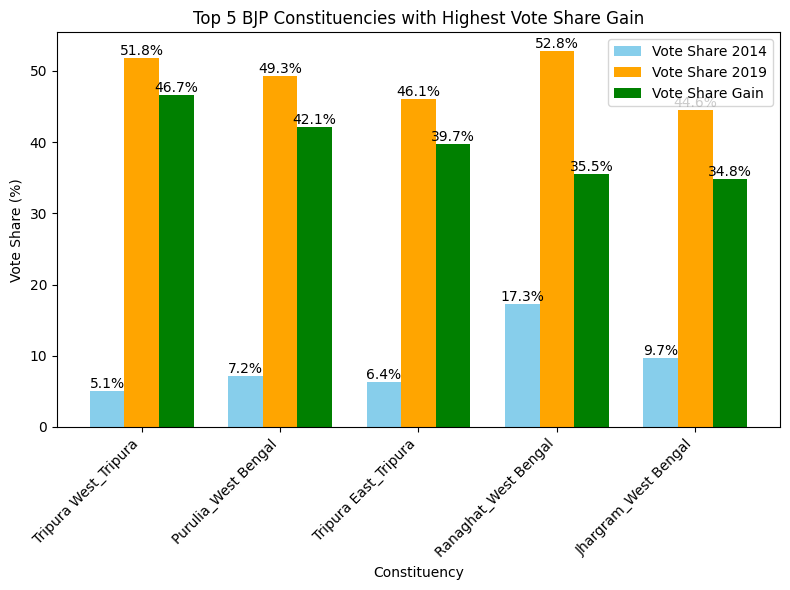

In [ ]:
# Set the positions and width for the bars
bar_width = 0.25
index = np.arange(len(top_5_bjp_gain))

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(8, 6))

bar1 = ax.bar(index, top_5_bjp_gain['vote_share_2014'], bar_width, label='Vote Share 2014', color='skyblue')
bar2 = ax.bar(index + bar_width, top_5_bjp_gain['vote_share_2019'], bar_width, label='Vote Share 2019', color='orange')
bar3 = ax.bar(index + 2 * bar_width, top_5_bjp_gain['vote_share_gain'], bar_width, label='Vote Share Gain', color='green')

# Add title and labels
ax.set_title('Top 5 BJP Constituencies with Highest Vote Share Gain')
ax.set_xlabel('Constituency')
ax.set_ylabel('Vote Share (%)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(top_5_bjp_gain.pc_name, rotation=45, ha='right')

# Add legend
ax.legend()

# Add annotations
for bar in bar1 + bar2 + bar3:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}%', va='bottom', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
print("\nTop 5 constituencies for INC with highest vote share gain:")
top_5_inc_gain[['pc_name', 'vote_share_2014', 'vote_share_2019', 'vote_share_gain']]


Top 5 constituencies for INC with highest vote share gain:


,pc_name,vote_share_2014,vote_share_2019,vote_share_gain
216,Karur_Tamil Nadu,2.910464,63.063730,60.153266
217,Tiruchirappalli_Tamil Nadu,5.214976,59.279413,54.064437
215,Arani_Tamil Nadu,2.528817,54.004390,51.475573
213,Thiruvallur _Tamil Nadu,3.504353,54.487856,50.983504
214,Krishnagiri_Tamil Nadu,3.639585,52.635984,48.996399


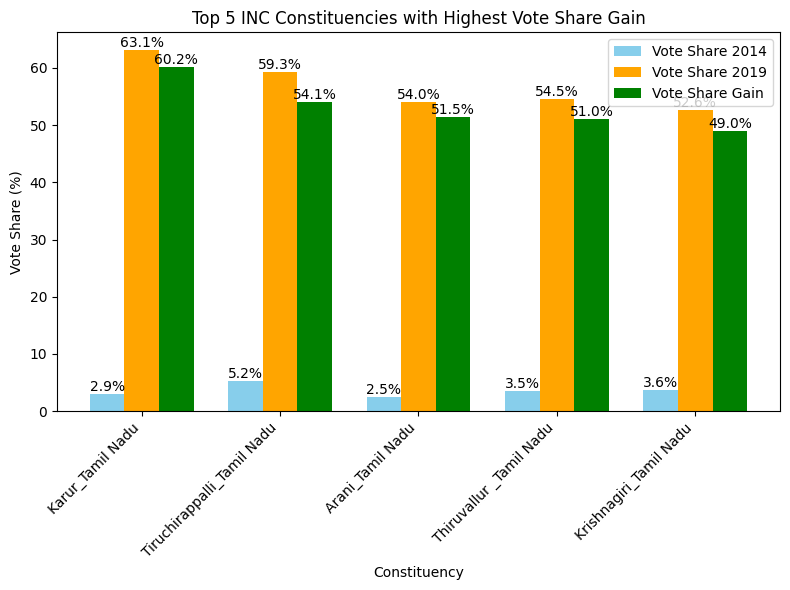

In [ ]:
# Set the positions and width for the bars
bar_width = 0.25
index = np.arange(len(top_5_inc_gain))

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(8, 6))

bar1 = ax.bar(index, top_5_inc_gain['vote_share_2014'], bar_width, label='Vote Share 2014', color='skyblue')
bar2 = ax.bar(index + bar_width, top_5_inc_gain['vote_share_2019'], bar_width, label='Vote Share 2019', color='orange')
bar3 = ax.bar(index + 2 * bar_width, top_5_inc_gain['vote_share_gain'], bar_width, label='Vote Share Gain', color='green')

# Add title and labels
ax.set_title('Top 5 INC Constituencies with Highest Vote Share Gain')
ax.set_xlabel('Constituency')
ax.set_ylabel('Vote Share (%)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(top_5_inc_gain.pc_name, rotation=45, ha='right')

# Add legend
ax.legend()

# Add annotations
for bar in bar1 + bar2 + bar3:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}%', va='bottom', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


# **9.	List top 5 constituencies for two major national parties where they have lost vote share in 2019 as compared to 2014.**


In [ ]:
# Calculate the loss in vote share
bjp_merged['vote_share_loss'] = bjp_merged['vote_share_2014'] - bjp_merged['vote_share_2019']
inc_merged['vote_share_loss'] = inc_merged['vote_share_2014'] - inc_merged['vote_share_2019']

# Get the top 5 constituencies with the highest vote share loss for each party
top_5_bjp_loss = bjp_merged.sort_values(by='vote_share_loss', ascending=False).head(5)
top_5_inc_loss = inc_merged.sort_values(by='vote_share_loss', ascending=False).head(5)

print("Top 5 constituencies for BJP with highest vote share loss:")
top_5_bjp_loss[['pc_name', 'vote_share_2014', 'vote_share_2019', 'vote_share_loss']]


Top 5 constituencies for BJP with highest vote share loss:


,pc_name,vote_share_2014,vote_share_2019,vote_share_loss
175,Sangli_Maharashtra,58.430014,42.774199,15.655815
349,Daman & diu_Daman & Diu,53.832838,42.983228,10.849610
6,Bhongir _Telangana,15.122898,5.397932,9.724966
214,Muzaffarnagar_Uttar Pradesh,59.000446,49.460766,9.539680
7,Warangal_Telangana,15.931727,7.891244,8.040482


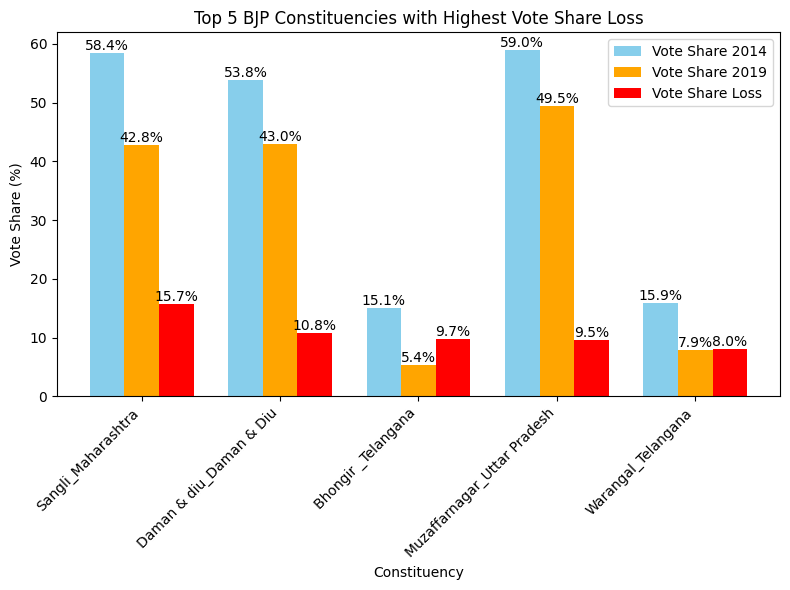

In [ ]:
# Set the positions and width for the bars
bar_width = 0.25
index = np.arange(len(top_5_inc_gain))

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(8, 6))

bar1 = ax.bar(index, top_5_bjp_loss['vote_share_2014'], bar_width, label='Vote Share 2014', color='skyblue')
bar2 = ax.bar(index + bar_width, top_5_bjp_loss['vote_share_2019'], bar_width, label='Vote Share 2019', color='orange')
bar3 = ax.bar(index + 2 * bar_width, top_5_bjp_loss['vote_share_loss'], bar_width, label='Vote Share Loss', color='red')

# Add title and labels
ax.set_title('Top 5 BJP Constituencies with Highest Vote Share Loss')
ax.set_xlabel('Constituency')
ax.set_ylabel('Vote Share (%)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(top_5_bjp_loss.pc_name, rotation=45, ha='right')

# Add legend
ax.legend()

# Add annotations
for bar in bar1 + bar2 + bar3:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}%', va='bottom', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
print("Top 5 constituencies for INC with highest vote share loss:")
top_5_inc_loss[['pc_name', 'vote_share_2014', 'vote_share_2019', 'vote_share_loss']]

Top 5 constituencies for INC with highest vote share loss:


,pc_name,vote_share_2014,vote_share_2019,vote_share_loss
169,Ratnagiri - sindhudurg_Maharashtra,38.274444,7.024621,31.249823
158,Aurangabad_Maharashtra,36.513374,7.660440,28.852934
15,ARUNACHAL WEST_Arunachal Pradesh,38.022731,14.220368,23.802363
286,Raiganj_West Bengal,28.504150,6.550890,21.953261
171,Outer manipur_Manipur,38.453365,17.774458,20.678908


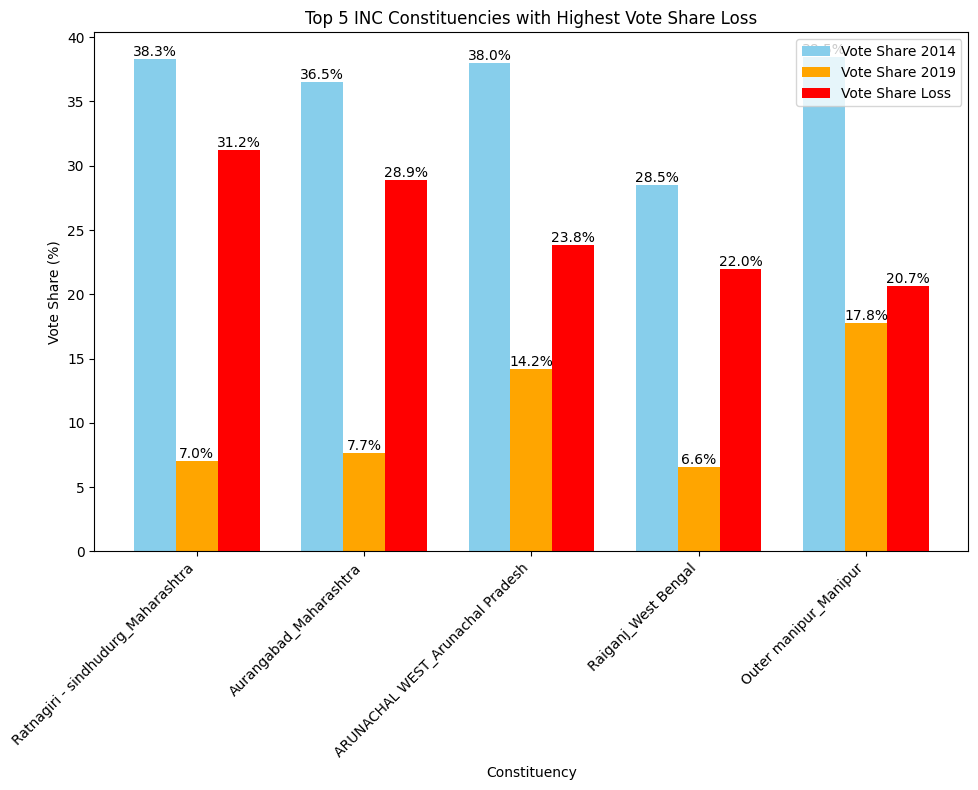

In [ ]:
# Set the positions and width for the bars
bar_width = 0.25
index = np.arange(len(top_5_inc_gain))

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(10, 8))

bar1 = ax.bar(index, top_5_inc_loss['vote_share_2014'], bar_width, label='Vote Share 2014', color='skyblue')
bar2 = ax.bar(index + bar_width, top_5_inc_loss['vote_share_2019'], bar_width, label='Vote Share 2019', color='orange')
bar3 = ax.bar(index + 2 * bar_width, top_5_inc_loss['vote_share_loss'], bar_width, label='Vote Share Loss', color='red')

# Add title and labels
ax.set_title('Top 5 INC Constituencies with Highest Vote Share Loss')
ax.set_xlabel('Constituency')
ax.set_ylabel('Vote Share (%)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(top_5_inc_loss.pc_name, rotation=45, ha='right')

# Add legend
ax.legend()

# Add annotations
for bar in bar1 + bar2 + bar3:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}%', va='bottom', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


# **10.	Which constituency has voted the most for NOTA?**

In [ ]:
highest_nota_votes_2014 = df_2014[df_2014['party']=='NOTA'].groupby('pc_name')['total_votes'].sum().reset_index()
highest_nota_votes_2014 = highest_nota_votes_2014.rename(columns= {'total_votes':'total_nota_votes'})
most_nota_voted_pc_2014 = highest_nota_votes_2014.sort_values(by='total_nota_votes' , ascending = False).head(5)
print("Top 5 Most Nota voted Constituency in 2014 election")
most_nota_voted_pc_2014

Top 5 Most Nota voted Constituency in 2014 election


,pc_name,total_nota_votes
363,Nilgiris _Tamil Nadu,46559
66,Banswara_Rajasthan,34404
132,Dahod_Gujarat,32305
396,RATLAM_Madhya Pradesh,30364
425,Samastipur (SC)_Bihar,29211


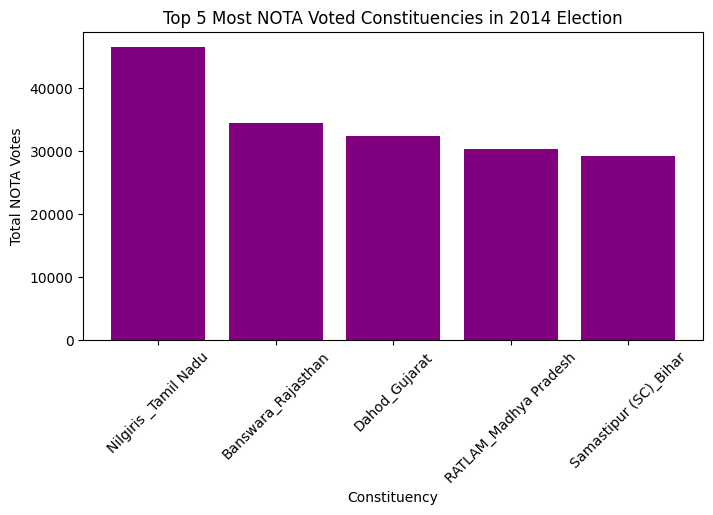

In [ ]:
# Plot the graph
plt.figure(figsize=(8, 4))
plt.bar(most_nota_voted_pc_2014['pc_name'], most_nota_voted_pc_2014['total_nota_votes'], color='purple')
plt.title('Top 5 Most NOTA Voted Constituencies in 2014 Election')
plt.xlabel('Constituency')
plt.ylabel('Total NOTA Votes')
plt.xticks(rotation=45)
plt.show()

In [ ]:
highest_nota_votes_2019 = df_2019[df_2019['party']=='NOTA'].groupby('pc_name')['total_votes'].sum().reset_index()
highest_nota_votes_2019 = highest_nota_votes_2019.rename(columns= {'total_votes':'total_nota_votes'})
most_nota_voted_pc_2019 = highest_nota_votes_2019.sort_values(by='total_nota_votes' , ascending = False).head(5)
print("Most Nota voted Constituency in 2019 election")
most_nota_voted_pc_2019

Most Nota voted Constituency in 2019 election


,pc_name,total_nota_votes
196,Gopalganj (SC)_Bihar,51660
37,Aruku _Andhra Pradesh,47977
401,Paschim Champaran_Bihar,45699
368,Nabarangpur _Odisha,44582
46,BASTAR_Chhattisgarh,41667


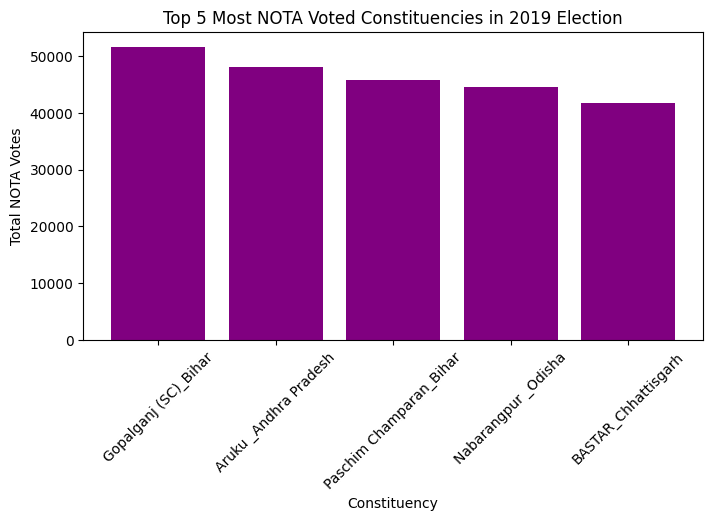

In [ ]:
# Plot the graph
plt.figure(figsize=(8, 4))
plt.bar(most_nota_voted_pc_2019['pc_name'], most_nota_voted_pc_2019['total_nota_votes'], color='purple')
plt.title('Top 5 Most NOTA Voted Constituencies in 2019 Election')
plt.xlabel('Constituency')
plt.ylabel('Total NOTA Votes')
plt.xticks(rotation=45)
plt.show()

# **11.	Which constituencies have elected candidates whose party has less than 10% vote share at state level in 2019?**

In [ ]:
parties_with_lessThan_10_vote_share = percent_votes_parties_df[percent_votes_parties_df.percent_votes_2019<10]

In [ ]:
parties_with_lessThan_10_vote_share

,state,party,percent_votes_2014,percent_votes_2019
0,Andaman & Nicobar Islands,AAAP,1.963453,1.369539
1,Andaman & Nicobar Islands,AIFB,0.118217,0.000000
2,Andaman & Nicobar Islands,AITC,1.199508,0.830214
4,Andaman & Nicobar Islands,BSP,0.598441,1.199251
5,Andaman & Nicobar Islands,CPI(ML)(L),0.229078,0.000000
...,...,...,...,...
1942,West Bengal,RVNP,0.000000,0.056259
1943,West Bengal,SHS,0.000000,0.092384
1944,West Bengal,STPI,0.000000,0.001276
1945,West Bengal,SUCI(C),0.000000,0.379982


In [ ]:
winning_party_2019 = winning_party_2019_df[['state','pc_name','party']]

# Merge with the winning_party_2019 DataFrame to find the constituencies
winning_parties_with_less_than_10_percent_state_votes = pd.merge(winning_party_2019, parties_with_lessThan_10_vote_share[['state', 'party']], on=['state', 'party'], how='inner')

In [ ]:
winning_parties_with_less_than_10_percent_state_votes

,state,pc_name,party
0,Assam,Dhubri_Assam,AIUDF
1,Assam,Kokrajhar_Assam,IND
2,Bihar,Hajipur (SC)_Bihar,LJP
3,Bihar,Jamui (SC)_Bihar,LJP
4,Bihar,Khagaria_Bihar,LJP
5,Bihar,Nawada_Bihar,LJP
6,Bihar,Samastipur (SC)_Bihar,LJP
7,Bihar,Vaishali_Bihar,LJP
8,Bihar,Kishanganj_Bihar,INC
9,Jammu & Kashmir,Anantnag_Jammu & Kashmir,JKN


# **Is there a correlation between postal votes % and voter turnout %?**

In [ ]:
# Calculate postal votes percentage
df_2019['postal_votes_percentage'] = (df_2019['postal_votes'] / df_2019['total_votes']) * 100

In [ ]:
merged_df_with_postal_votes = pd.merge(df_2019[['state', 'pc_name', 'postal_votes_percentage']], turnout_ratio_2019.reset_index(), on=['state', 'pc_name'])
merged_df_with_postal_votes.rename(columns={0:'turnout_ratio_2019'} , inplace= True)
merged_df_with_postal_votes

,state,pc_name,postal_votes_percentage,turnout_ratio_2019
0,Andhra Pradesh,Aruku _Andhra Pradesh,0.573201,74.033669
1,Andhra Pradesh,Aruku _Andhra Pradesh,1.617507,74.033669
2,Andhra Pradesh,Aruku _Andhra Pradesh,0.823387,74.033669
3,Andhra Pradesh,Aruku _Andhra Pradesh,0.417372,74.033669
4,Andhra Pradesh,Aruku _Andhra Pradesh,1.282890,74.033669
...,...,...,...,...
8592,Puducherry,Puducherry_Puducherry,0.000000,81.236067
8593,Puducherry,Puducherry_Puducherry,0.000000,81.236067
8594,Puducherry,Puducherry_Puducherry,0.000000,81.236067
8595,Puducherry,Puducherry_Puducherry,0.155763,81.236067


In [ ]:
# Compute the correlation
correlation = merged_df_with_postal_votes['postal_votes_percentage'].corr(merged_df_with_postal_votes['turnout_ratio_2019'])
print(f"The correlation between postal votes percentage and voter turnout percentage is: {correlation:.2f}")


The correlation between postal votes percentage and voter turnout percentage is: -0.02


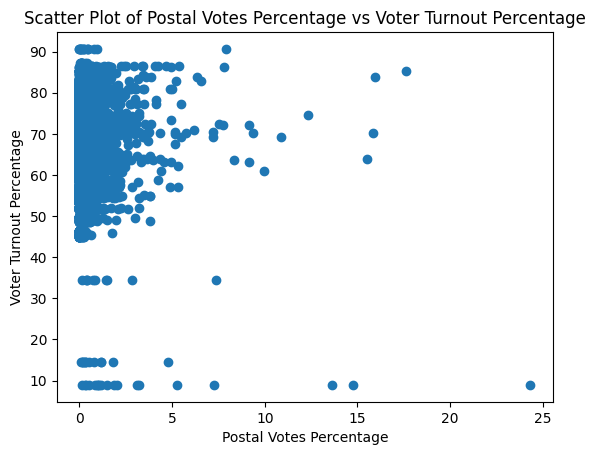

In [ ]:
# Scatter plot
plt.scatter(merged_df_with_postal_votes['postal_votes_percentage'], merged_df_with_postal_votes['turnout_ratio_2019'])
plt.title('Scatter Plot of Postal Votes Percentage vs Voter Turnout Percentage')
plt.xlabel('Postal Votes Percentage')
plt.ylabel('Voter Turnout Percentage')
plt.show()

A correlation coefficient of -0.02 indicates that there is almost no linear relationship between postal votes percentage and voter turnout percentage.

# **2.	Is there any correlation between GDP of a state and voter turnout %??**

In [ ]:
gdp_df = pd.read_csv('stats_gdp_2014.csv')
gdp_df.drop('Unnamed: 0' ,axis =1  , inplace = True)
gdp_df['GDP'] = gdp_df['GDP'].str.replace(',', '').astype(float)

In [ ]:
gdp_df.dtypes

state     object
GDP      float64
dtype: object

In [ ]:
gdp_df['state'].replace('Jammu and Kashmir' , 'Jammu & Kashmir' , inplace=True)
gdp_df['state'].replace('Andaman and Nicobar Islands' , 'Andaman & Nicobar Islands' , inplace=True)
gdp_df['state'].replace('Delhi' , 'NCT OF Delhi' , inplace=True)

In [ ]:
merged_df_with_gdp = pd.merge(gdp_df, turnout_ratio_state_2019.reset_index(), on='state' , how='inner')
merged_df_with_gdp = merged_df_with_gdp.groupby('state').first()

In [ ]:
merged_df_with_gdp.rename(columns={0:'voter_turnout_2019'} , inplace = True)

In [ ]:
# Calculate the correlation
correlation = merged_df_with_gdp['GDP'].corr(merged_df_with_gdp['voter_turnout_2019'])
print(f"The correlation between GDP and voter turnout percentage is: {correlation:.2f}")

The correlation between GDP and voter turnout percentage is: -0.28


This suggests that there is a slight negative relationship between GDP and voter turnout percentage.

Higher GDP states might not necessarily have higher voter turnout percentages.

Factors other than GDP might be more significant in influencing voter turnout.

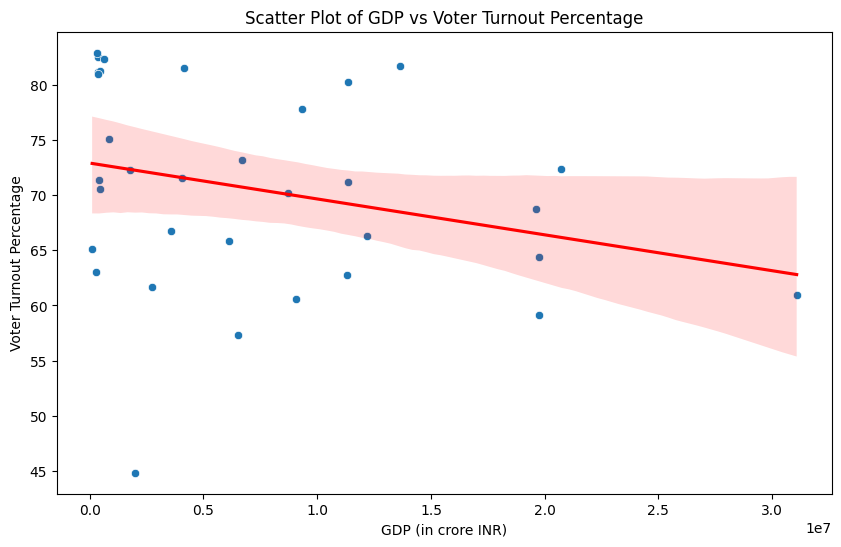

In [ ]:
import seaborn as sns
# Create the scatter plot with line of best fit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='voter_turnout_2019', data=merged_df_with_gdp)
sns.regplot(x='GDP', y='voter_turnout_2019', data=merged_df_with_gdp, scatter=False, color='red')
plt.title('Scatter Plot of GDP vs Voter Turnout Percentage')
plt.xlabel('GDP (in crore INR)')
plt.ylabel('Voter Turnout Percentage')
plt.show()

# **3.	Is there any correlation between literacy % of a state and voter turnout %?**

In [ ]:
df_literacy= pd.read_csv('literacy_rates.csv')

In [ ]:
df_literacy.rename(columns={'State/Union Territory':'state'} , inplace= True)

In Indian states found that literacy rates  do not significantly influence overall voter turnout

The correlation between literacy rate and voter turnout percentage is: 0.23


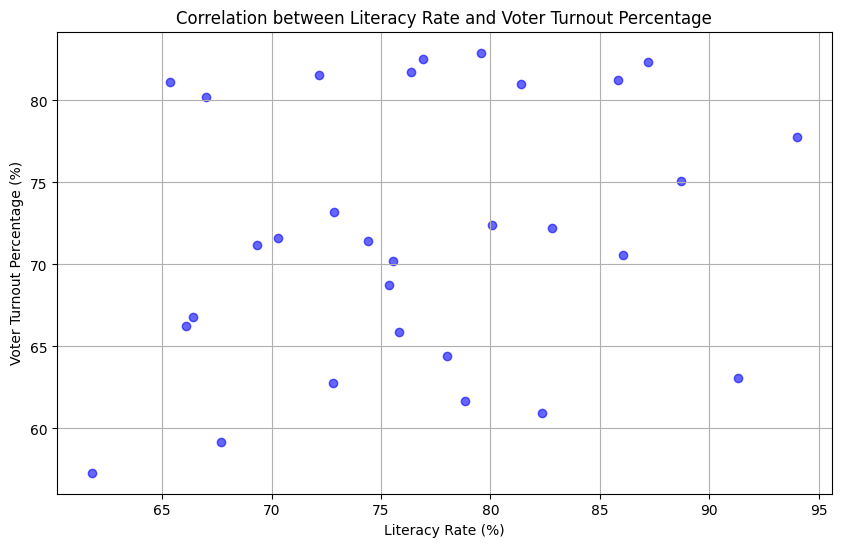

In [ ]:
# Merge literacy rates with voter turnout data
df_merged = pd.merge(df_literacy, merged_df_with_gdp, on='state', how='inner')

# Calculate correlation
correlation = df_merged['Literacy Rate (%)'].corr(df_merged['voter_turnout_2019'])
print(f"The correlation between literacy rate and voter turnout percentage is: {correlation:.2f}")

# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Literacy Rate (%)'], df_merged['voter_turnout_2019'], color='blue', alpha=0.6)
plt.title('Correlation between Literacy Rate and Voter Turnout Percentage')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Voter Turnout Percentage (%)')
plt.grid(True)
plt.show()

Based on the correlation value of 0.23, we can make the following observations and recommendations:

Weak Positive Relationship: There is a weak positive relationship between literacy rate and voter turnout percentage. This indicates that states with higher literacy rates tend to have slightly higher voter turnout percentages, but the relationship is not very strong.

# **Candidates ratio based on gender in 2014 and 2019**

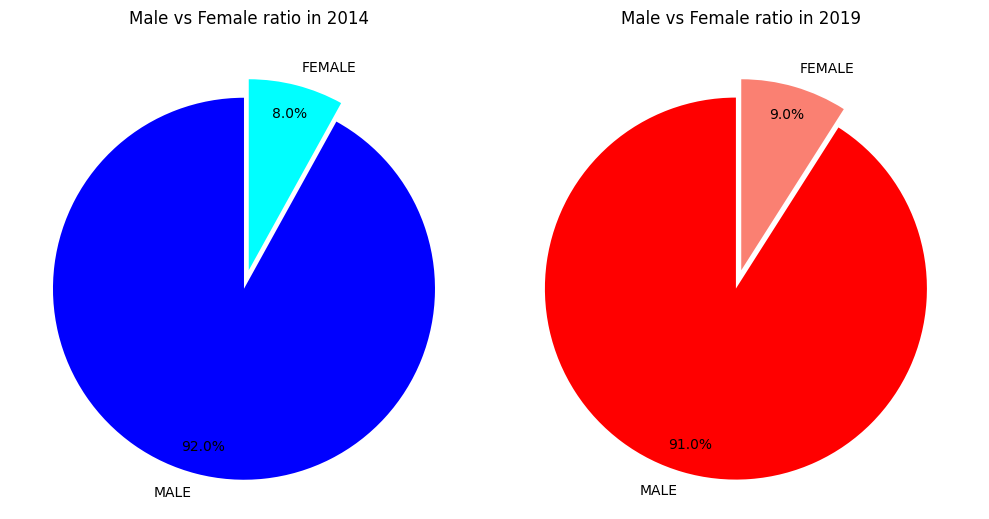

In [ ]:
male_count_2014=(df_2014['sex']=='M').sum()
female_count_2014=(df_2014['sex']=='F').sum()

male_count_2019=(df_2019['sex']=='MALE').sum()
female_count_2019=(df_2019['sex']=='FEMALE').sum()


y_2014=np.array([male_count_2014,female_count_2014])
y_2019=np.array([male_count_2019,female_count_2019])

pie_labels = ["MALE","FEMALE"]
explodeTuple = (0.1, 0.0)

clrs_2014=['blue','aqua']
clrs_2019=['red','salmon']

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10, 6))

axes[0].pie(y_2014,explode=explodeTuple, labels = pie_labels, startangle = 90,autopct='%1.1f%%',pctdistance=0.85,colors=clrs_2014)        # Plotting a pie chart
axes[0].set_title('Male vs Female ratio in 2014')

axes[1].pie(y_2019,explode=explodeTuple, labels = pie_labels, startangle = 90,autopct='%1.1f%%',pctdistance=0.85,colors=clrs_2019)
axes[1].set_title('Male vs Female ratio in 2019')

plt.tight_layout()
plt.show()

# **Recommendations**

1) Enhance Voter Education Programs: especially in states with lower literacy rates
2) Improve Accessibility for Postal Voting:

3) Party Performance:

BJP Dominance: The BJP has the highest percentage of vote share in both 2014 and 2019, significantly outperforming other parties.

INC Second: The Indian National Congress (INC) follows as the second-highest in terms of vote share, though with a substantial gap compared to BJP.

4) Voter Turnout:

Highest Voter Turnout: North Eastern states such as Nagaland, Tripura, and Manipur exhibit the highest voter turnout ratios.

Lowest Voter Turnout: Jammu & Kashmir consistently shows the lowest voter turnout in both 2014 and 2019.

5) NOTA Votes:

High NOTA Votes in Tribal Areas: Constituencies like Nilgiris and Araku, which have significant tribal populations, recorded the highest NOTA votes in both elections.

Increase in NOTA Awareness: There is an observable increase in NOTA votes from 2014 to 2019, indicating growing awareness and usage of this option.

6)Need for Improved Postal Voting:
 Increasing the accessibility and awareness of postal voting could potentially engage more voters.

 7)Gender Participation:

Male Dominance in Candidacy: Male candidates continue to dominate election participation compared to female candidates, highlighting the need for more gender-inclusive political participation initiatives.